In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 预备知识

### 1. tf.where( 条件语句，真返回A ，假返回B)

In [2]:
a=tf.constant([1,2,3,1,1])
b=tf.constant([0,1,3,4,5])
c=tf.where(tf.greater(a,b), a, b)
c.numpy()

array([1, 2, 3, 4, 5])

### 2. np.random.RandomState().rand()  : 取[0,1)之间的随机数

In [3]:
a=np.random.RandomState(seed=1).rand(   )    #  返回一个0-1随机标量
b=np.random.RandomState(seed=2).rand(2,3)    #  返回维度为 2行 3列随机数矩阵
print("a:",a)
print("b:",b)

a: 0.417022004702574
b: [[0.4359949  0.02592623 0.54966248]
 [0.43532239 0.4203678  0.33033482]]


### 3. np.vstack( (数组1, 数组2) ) 数组的纵向叠加

In [4]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.vstack((a,b))
print("c:\n",c)

c:
 [[1 2 3]
 [4 5 6]]


### 4. np.mgrid[ 起始值 : 结束值 : 步长 , …]  → 制造x,y网格
### 5. 数组.ravel( )  → 转化为一维数组
### 6. np.c_[数组1，数组2，… ]  → 等长数组的配对

In [5]:
x0 = np.mgrid[1:3:1]
y0 = np.mgrid[2:4:0.5]
x1, y1 = np.mgrid[1:3:1, 2:4:0.5]      # 这样会使x1, y1形状一样
x2 = x1.ravel()      # n维数组变为1维数组
y2 = y1.ravel()
grid = np.c_[x2, y2] # 2个等长的一位数组配对
print("-------------------------\n x0",x0)
print("-------------------------\n y0",y0)
print("-------------------------\n x1",x1)
print("-------------------------\n y1",y1)
print("-------------------------\n x2",x2)
print("-------------------------\n y2",y2)
print("-------------------------\n grid",grid)

-------------------------
 x0 [1 2]
-------------------------
 y0 [2.  2.5 3.  3.5]
-------------------------
 x1 [[1. 1. 1. 1.]
 [2. 2. 2. 2.]]
-------------------------
 y1 [[2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]]
-------------------------
 x2 [1. 1. 1. 1. 2. 2. 2. 2.]
-------------------------
 y2 [2.  2.5 3.  3.5 2.  2.5 3.  3.5]
-------------------------
 grid [[1.  2. ]
 [1.  2.5]
 [1.  3. ]
 [1.  3.5]
 [2.  2. ]
 [2.  2.5]
 [2.  3. ]
 [2.  3.5]]


# 复杂度
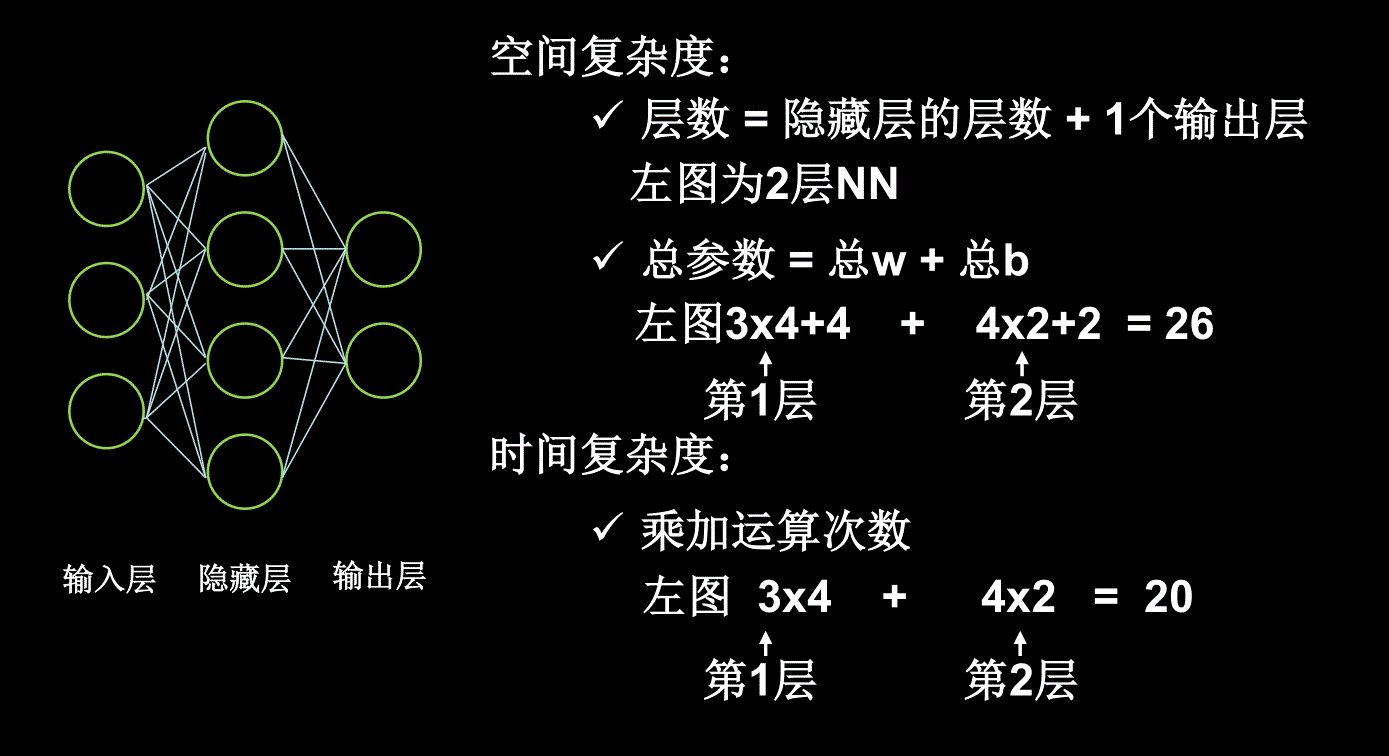

# 学习率
### 1. 固定学习率
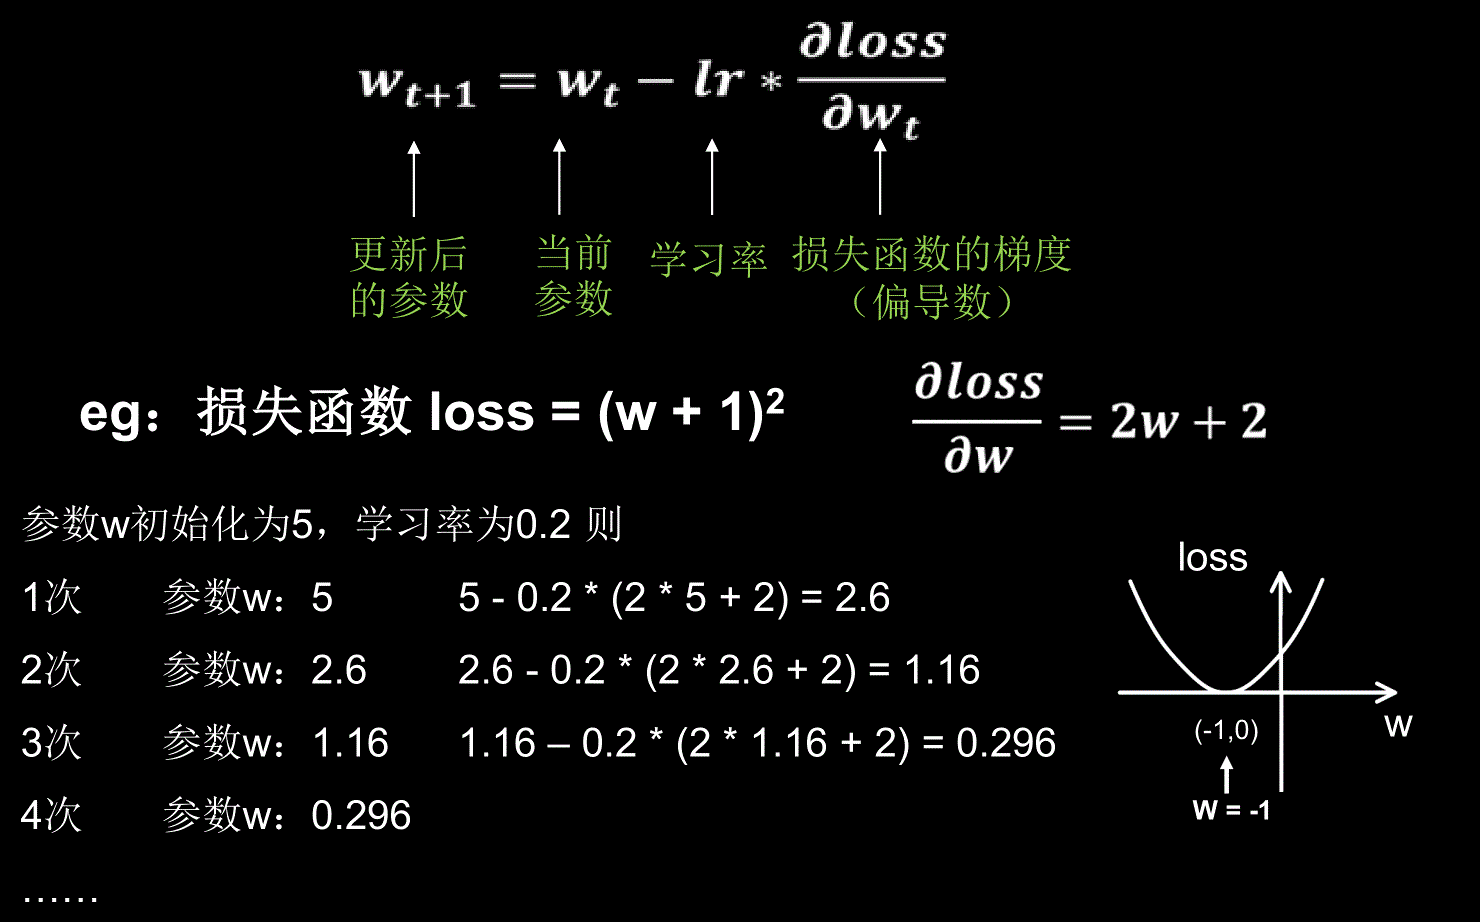

### 2.指数衰减学习率
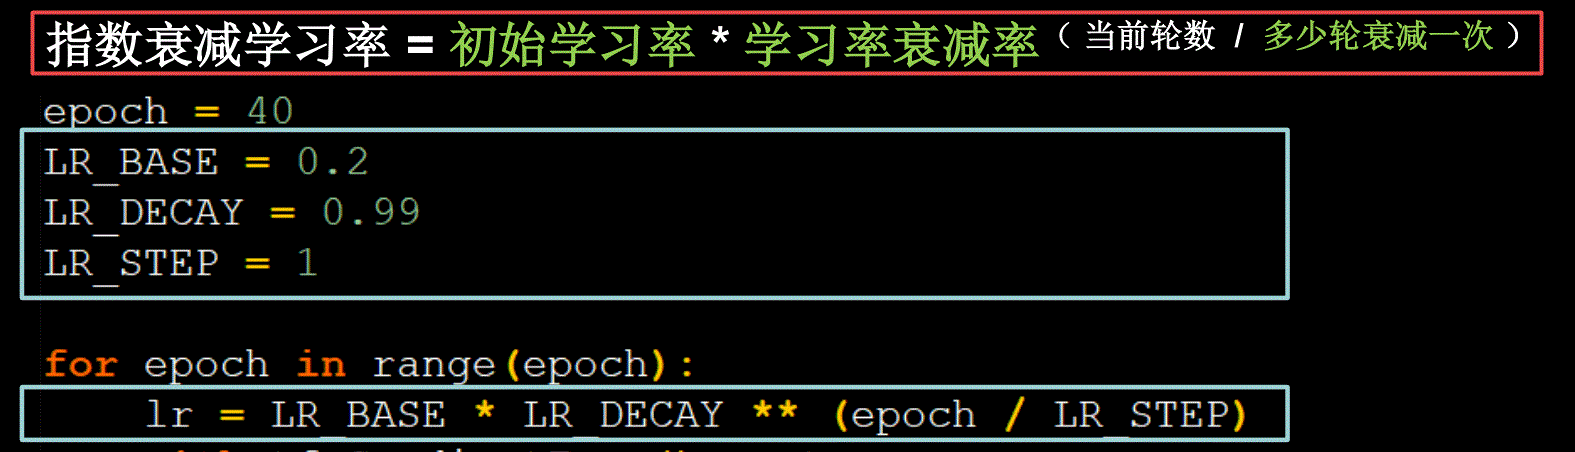

In [6]:
w = tf.Variable(tf.constant(5, dtype=tf.float32))

epoch = 400
LR_BASE = 0.2  # 最初学习率
LR_DECAY = 0.99  # 学习率衰减率
LR_STEP = 1  # 喂入多少轮BATCH_SIZE后，更新一次学习率

for epoch in range(epoch):  # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环100次迭代。
    lr = LR_BASE * LR_DECAY ** (epoch / LR_STEP)
#     lr = 0.2
    with tf.GradientTape() as tape:  # with结构到grads框起了梯度的计算过程。
        loss = tf.square(w + 1)
    grads = tape.gradient(loss, w)  # .gradient函数告知谁对谁求导

    w.assign_sub(lr * grads)  # .assign_sub 对变量做自减 即：w -= lr*grads 即 w = w - lr*grads
    print('第{}次后，学习率是{}，w变化为{}'.format(epoch,lr,w.numpy()))

第0次后，学习率是0.2，w变化为2.5999999046325684
第1次后，学习率是0.198，w变化为1.174399971961975
第2次后，学习率是0.19602，w变化为0.32194823026657104
第3次后，学习率是0.1940598，w变化为-0.1911258101463318
第4次后，学习率是0.192119202，w变化为-0.5019263029098511
第5次后，学习率是0.19019800998，w变化为-0.6913915276527405
第6次后，学习率是0.1882960298802，w变化为-0.8076110482215881
第7次后，学习率是0.186413069581398，w变化为-0.8793386816978455
第8次后，学习率是0.18454893888558402，w变化为-0.9238744974136353
第9次后，学习率是0.18270344949672818，w变化为-0.9516912698745728
第10次后，学习率是0.18087641500176088，w变化为-0.9691671133041382
第11次后，学习率是0.17906765085174328，w变化为-0.980209469795227
第12次后，学习率是0.17727697434322587，w变化为-0.9872263073921204
第13次后，学习率是0.17550420459979357，w变化为-0.9917100071907043
第14次后，学习率是0.17374916255379566，w变化为-0.9945907592773438
第15次后，学习率是0.1720116709282577，w变化为-0.9964516758918762
第16次后，学习率是0.17029155421897513，w变化为-0.9976601600646973
第17次后，学习率是0.16858863867678536，w变化为-0.9984490871429443
第18次后，学习率是0.1669027522900175，w变化为-0.9989668130874634
第19次后，学习率是0.16523372476711734，w变化为-0.9993082284927368
第20次后，学习

第363次后，学习率是0.005207216498784028，w变化为-0.9999999403953552
第364次后，学习率是0.005155144333796187，w变化为-0.9999999403953552
第365次后，学习率是0.005103592890458225，w变化为-0.9999999403953552
第366次后，学习率是0.005052556961553643，w变化为-0.9999999403953552
第367次后，学习率是0.0050020313919381075，w变化为-0.9999999403953552
第368次后，学习率是0.004952011078018726，w变化为-0.9999999403953552
第369次后，学习率是0.004902490967238538，w变化为-0.9999999403953552
第370次后，学习率是0.004853466057566153，w变化为-0.9999999403953552
第371次后，学习率是0.004804931396990491，w变化为-0.9999999403953552
第372次后，学习率是0.0047568820830205865，w变化为-0.9999999403953552
第373次后，学习率是0.00470931326219038，w变化为-0.9999999403953552
第374次后，学习率是0.0046622201295684765，w变化为-0.9999999403953552
第375次后，学习率是0.004615597928272792，w变化为-0.9999999403953552
第376次后，学习率是0.004569441948990063，w变化为-0.9999999403953552
第377次后，学习率是0.004523747529500163，w变化为-0.9999999403953552
第378次后，学习率是0.004478510054205162，w变化为-0.9999999403953552
第379次后，学习率是0.004433724953663109，w变化为-0.9999999403953552
第380次后，学习率是0.004389387704126479，w变化为-0.9999999

# 激活函数

### 1.tf.nn.sigmoid()
在神经网络刚兴起的时候sigmoid函数用的多，现在用的很少了。因为：  
 1. 深层神经网络更新参数时需要从输出层逐层链式求导到输入层，而sigmiod函数的导数永远在0-0.25之间，在导数连续相乘之后会趋于0，造成梯度消失，使的参数无法继续更新。  
 2. 我们最希望激活函数输出的数据是以0为均值的正负小数，而sigmoid只有正数，不是很好。
 3. 另外sigmoid函数存在幂运算，运算复杂度大，训练慢。  
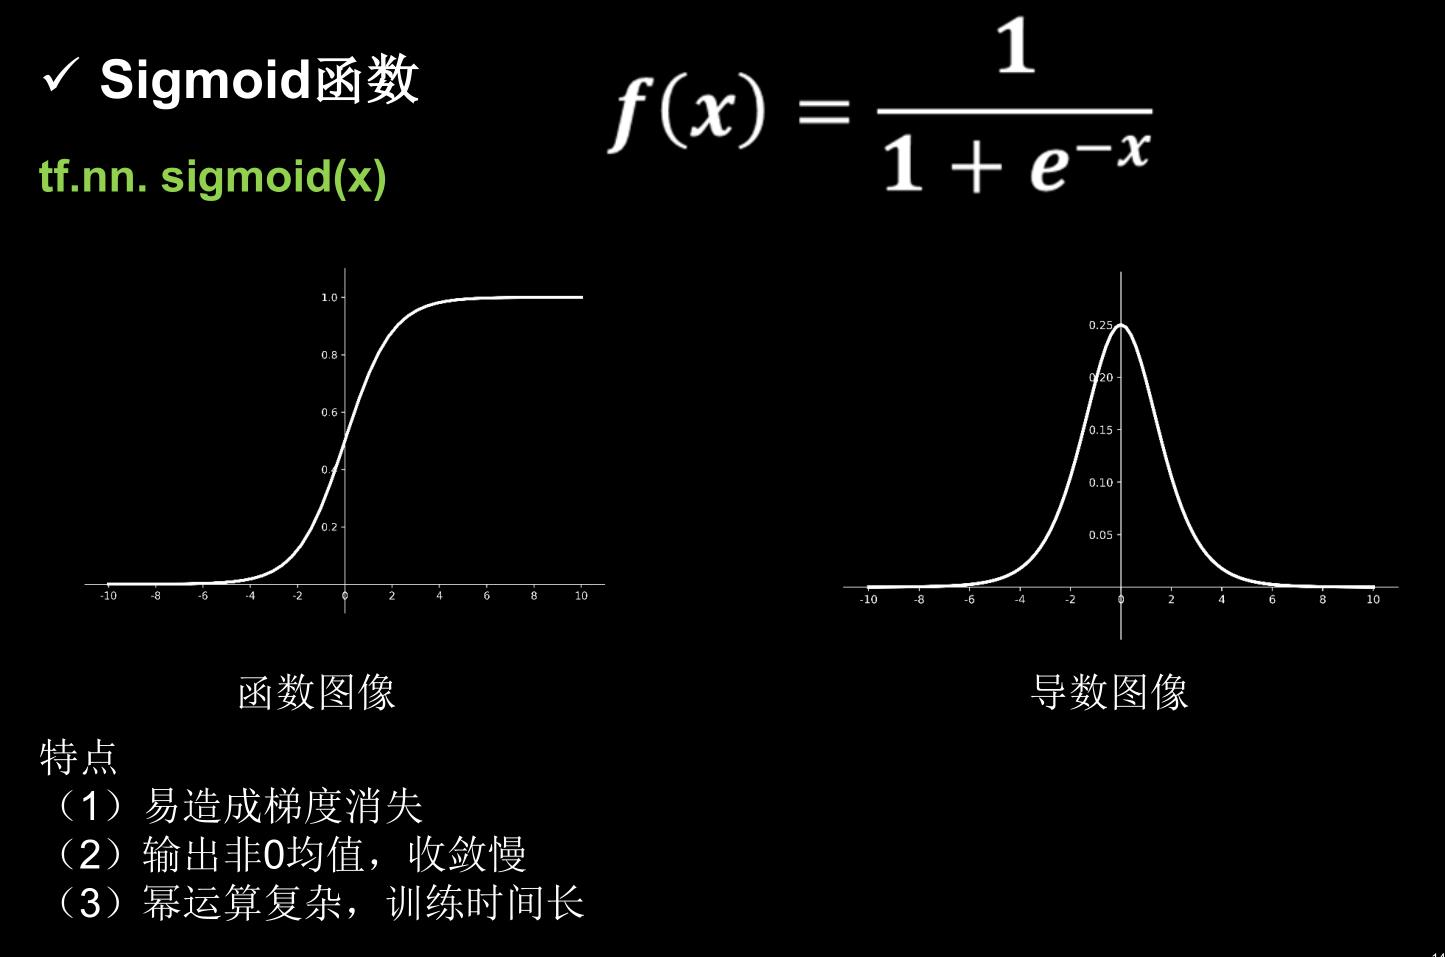

### 2.tf.math. tanh()
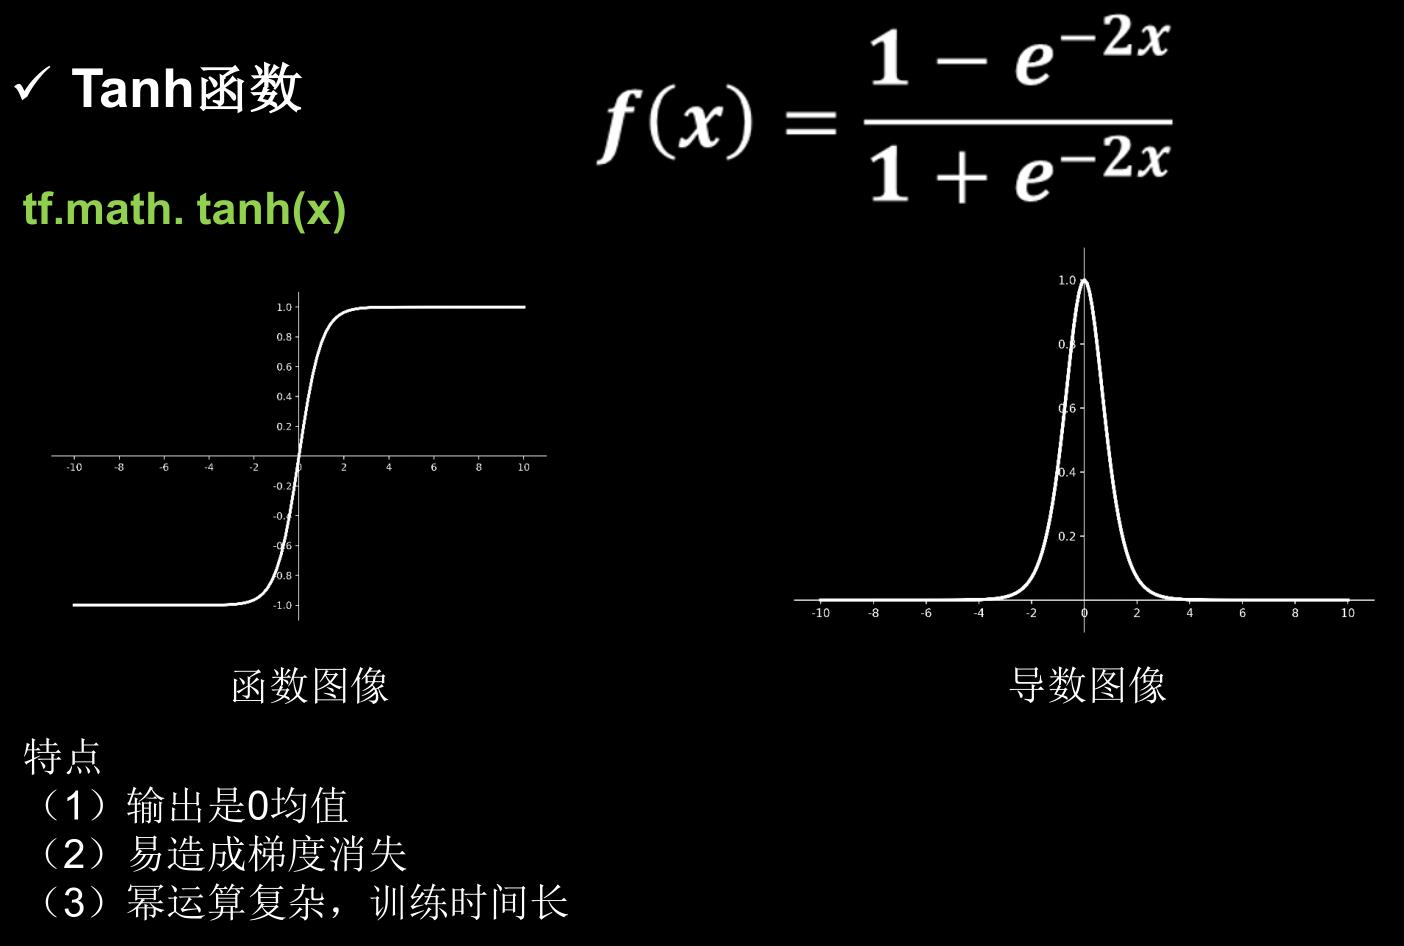

### 3.tf.nn.relu()
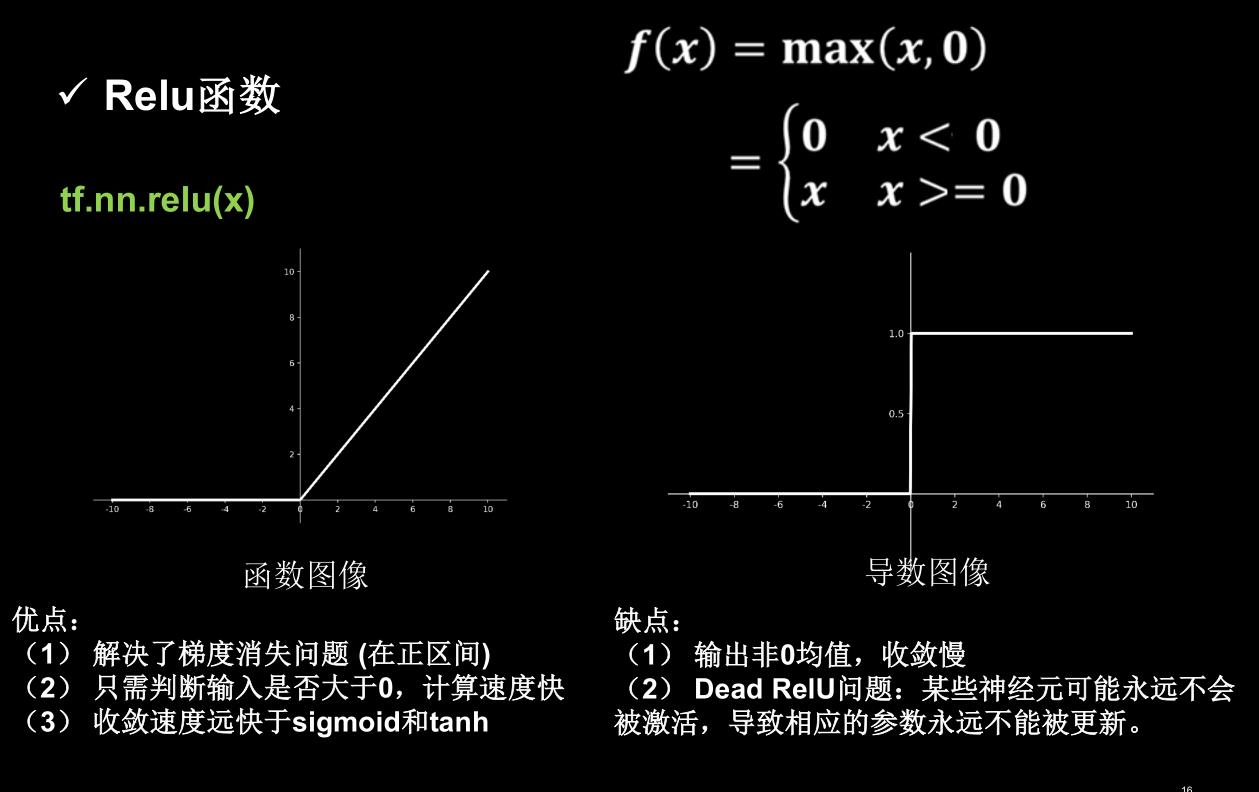

### 4.tf.nn.leaky_relu(x)
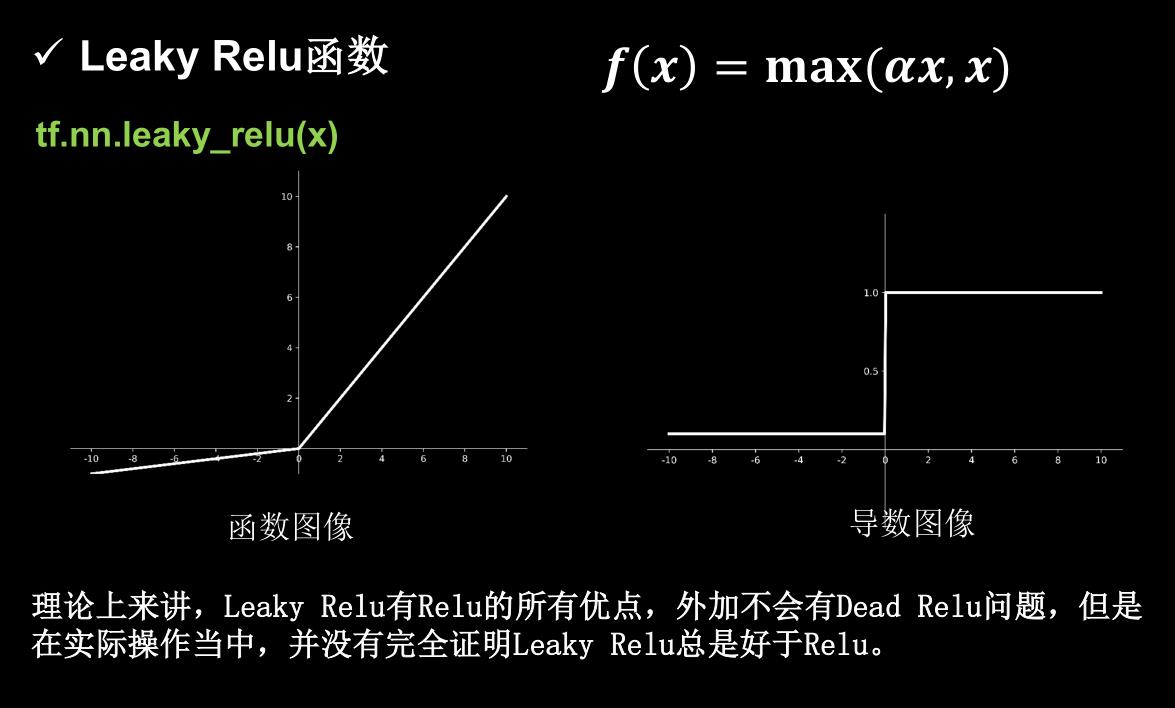


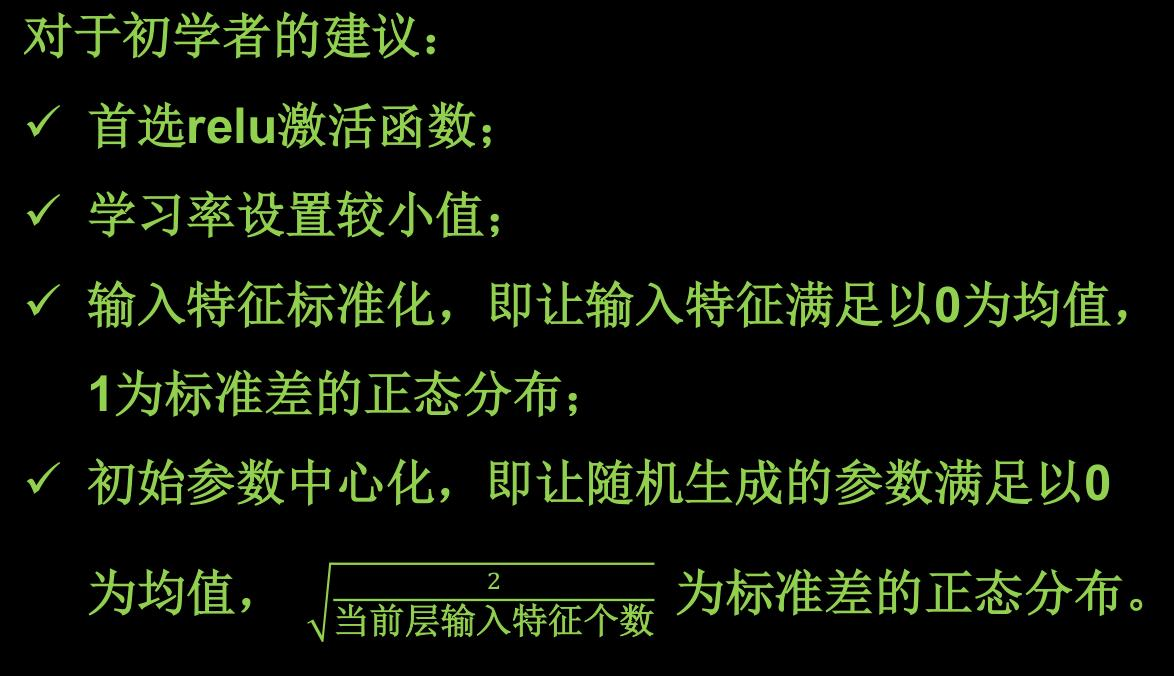

# 损失函数 loss = y(预测值) - y_(已知答案)

### 1.均方误差 loss_mse = tf.reduce_mean(tf.square(y-y_))
例子：*预测酸奶日销量y。  
x1、x2是影响日销量的因素，应预先采集每日x1、x2和销量y_（即已知答案，最佳情况：产量=销量）。  
1.拟造数据集X,Y_。  
2.假设：y_ = 0.7x1 + 0.3x2 - 100   
3.给定噪声：-0.05 ~ 0.05 拟合可以预测销量y的函数*

In [7]:
# 1.编造数据
rdm = np.random.RandomState()  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
X = tf.cast(x, dtype=tf.float32)

# 2.设置参数&超参数
r = 0.002
epoches = 15000
w = tf.Variable(tf.random.normal([2, 1], stddev=1))

# 3.循环迭代
for epoch in range(epoches):
    with tf.GradientTape() as tape:
        y = tf.matmul(X, w)
        loss = tf.reduce_mean(tf.square(y - y_))
    dloss_dw = tape.gradient(loss, w)
    w.assign_sub(r * dloss_dw)
    if epoch % 500 == 0:
        print('当前第{}步\n当前参数w的值为{}\n------------------------------------'.format(epoch, w.numpy()))
print("最终参数w为: ", w.numpy())
        

当前第0步
当前参数w的值为[[ 0.00532661]
 [-0.29378766]]
------------------------------------
当前第500步
当前参数w的值为[[0.8402671]
 [0.5144144]]
------------------------------------
当前第1000步
当前参数w的值为[[1.0524418]
 [0.7572499]]
------------------------------------
当前第1500步
当前参数w的值为[[1.0957237 ]
 [0.84120107]]
------------------------------------
当前第2000步
当前参数w的值为[[1.0947806]
 [0.8787627]]
------------------------------------
当前第2500步
当前参数w的值为[[1.0836145]
 [0.9013359]]
------------------------------------
当前第3000步
当前参数w的值为[[1.0713007 ]
 [0.91791034]]
------------------------------------
当前第3500步
当前参数w的值为[[1.0600774]
 [0.9312508]]
------------------------------------
当前第4000步
当前参数w的值为[[1.0503519]
 [0.9423595]]
------------------------------------
当前第4500步
当前参数w的值为[[1.0420527]
 [0.951718 ]]
------------------------------------
当前第5000步
当前参数w的值为[[1.035005 ]
 [0.9596321]]
------------------------------------
当前第5500步
当前参数w的值为[[1.0290295]
 [0.966333 ]]
------------------------------------
当前第6000步
当前参数w的值为[[1.023

### 2.自定义误差 
如预测商品销量，预测多了，损失成本；预测少了，损失利润。
loss_zdy = tf.reduce_sum(tf.where(tf.greater(y. y_), COST(y - y_), PROFIT(y_ - y)))  
例子：  
*如：酸奶成本1元，利润99元。  
预测少了损失利润99元，大于预测多了损失成本1元。  
希望往多了预测*

In [8]:
# 1.编造数据
rdm = np.random.RandomState()  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
X = tf.cast(x, dtype=tf.float32)

# 2.设置参数&超参数
r = 0.002
epoches = 15000
w = tf.Variable(tf.random.normal([2, 1], stddev=1))
COST = 1
PROFIT = 99
# 3.循环迭代
for epoch in range(epoches):
    with tf.GradientTape() as tape:
        y = tf.matmul(X, w)
        loss = tf.reduce_sum(tf.where(tf.greater(y, y_), COST * (y - y_), PROFIT * (y_ - y)))
    dloss_dw = tape.gradient(loss, w)
    w.assign_sub(r * dloss_dw)
    if epoch % 500 == 0:
        print('当前第{}步\n当前参数w的值为{}\n------------------------------------'.format(epoch, w.numpy()))
print("最终参数w为: ", w.numpy())
'''最终w的两个参数都大于1'''

当前第0步
当前参数w的值为[[4.0582147]
 [3.1593282]]
------------------------------------
当前第500步
当前参数w的值为[[1.0204009]
 [1.1059431]]
------------------------------------
当前第1000步
当前参数w的值为[[1.0534787]
 [1.025277 ]]
------------------------------------
当前第1500步
当前参数w的值为[[1.050295 ]
 [1.1352905]]
------------------------------------
当前第2000步
当前参数w的值为[[1.0096387]
 [1.2107357]]
------------------------------------
当前第2500步
当前参数w的值为[[1.1674407]
 [1.1117455]]
------------------------------------
当前第3000步
当前参数w的值为[[1.2309794]
 [1.121063 ]]
------------------------------------
当前第3500步
当前参数w的值为[[1.0575111]
 [1.1332097]]
------------------------------------
当前第4000步
当前参数w的值为[[1.0710503]
 [1.0596054]]
------------------------------------
当前第4500步
当前参数w的值为[[1.1209856]
 [1.0889175]]
------------------------------------
当前第5000步
当前参数w的值为[[1.0146159]
 [1.1423563]]
------------------------------------
当前第5500步
当前参数w的值为[[1.1674547]
 [1.0609884]]
------------------------------------
当前第6000步
当前参数w的值为[[1.1190492]
 [

'最终w的两个参数都大于1'

### 3.交叉熵损失函数(Cross Entropy)
$$\mbox{交叉熵公式:}H(y\_,y)=-\sum y\_*ln(y)$$
*eg. 已知答案y_=(1, 0) 预测 y1=(0.6, 0.4) | y2 =(0.8, 0.2).哪个更接近标准答案？*  
H1 ((1,0),(0.6,0.4)) = -(1*ln0.6 + 0*ln0.4) ≈ -(-0.511 + 0) = 0.511  
H2 ((1,0),(0.8,0.2)) = -(1*ln0.8 + 0*ln0.2) ≈ -(-0.223 + 0) = 0.223  
H2 < H1, y2更接近标准答案
+ tf.losses.categorical_crossentropy(y_ ，y)

In [9]:
loss_ce1=tf.losses.categorical_crossentropy([1,0],[0.6,0.4])
loss_ce2=tf.losses.categorical_crossentropy([1,0],[0.8,0.2])
print("loss_ce1:", loss_ce1.numpy())
print("loss_ce2:", loss_ce2.numpy())

loss_ce1: 0.5108256
loss_ce2: 0.22314353


### 4.先softmax(y)，再计算y 与y_ 的交叉熵
+ tf.nn.softmax_cross_entropy_with_logits(y_ ，y)

In [10]:
np.set_printoptions(suppress=True) # 不用科学计数法
y_ = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]])
y  = np.array([[12, 3, 2], [3, 10, 1], [1, 2, 5], [4, 6.5, 1.2], [3, 6, 1]])

y_pro = tf.nn.softmax(y)
loss_ce1 = tf.losses.categorical_crossentropy(y_, y_pro)

loss_ce2 = tf.nn.softmax_cross_entropy_with_logits(y_, y) # 一步到位
print('第一步：y经过softmax以后：\n',y_pro.numpy())
print('第二步：分步计算的结果:\n', loss_ce1.numpy())
print('结合计算的结果:\n', loss_ce2.numpy())

第一步：y经过softmax以后：
 [[0.99983122 0.00012339 0.00004539]
 [0.00091094 0.99896578 0.00012328]
 [0.01714783 0.04661262 0.93623955]
 [0.07550986 0.91989838 0.00459176]
 [0.04712342 0.94649912 0.00637746]]
第二步：分步计算的结果:
 [0.0001688  0.00103476 0.0658839  2.58349207 0.05498524]
结合计算的结果:
 [0.0001688  0.00103476 0.0658839  2.58349207 0.05498524]


# 欠拟合 & 过拟合
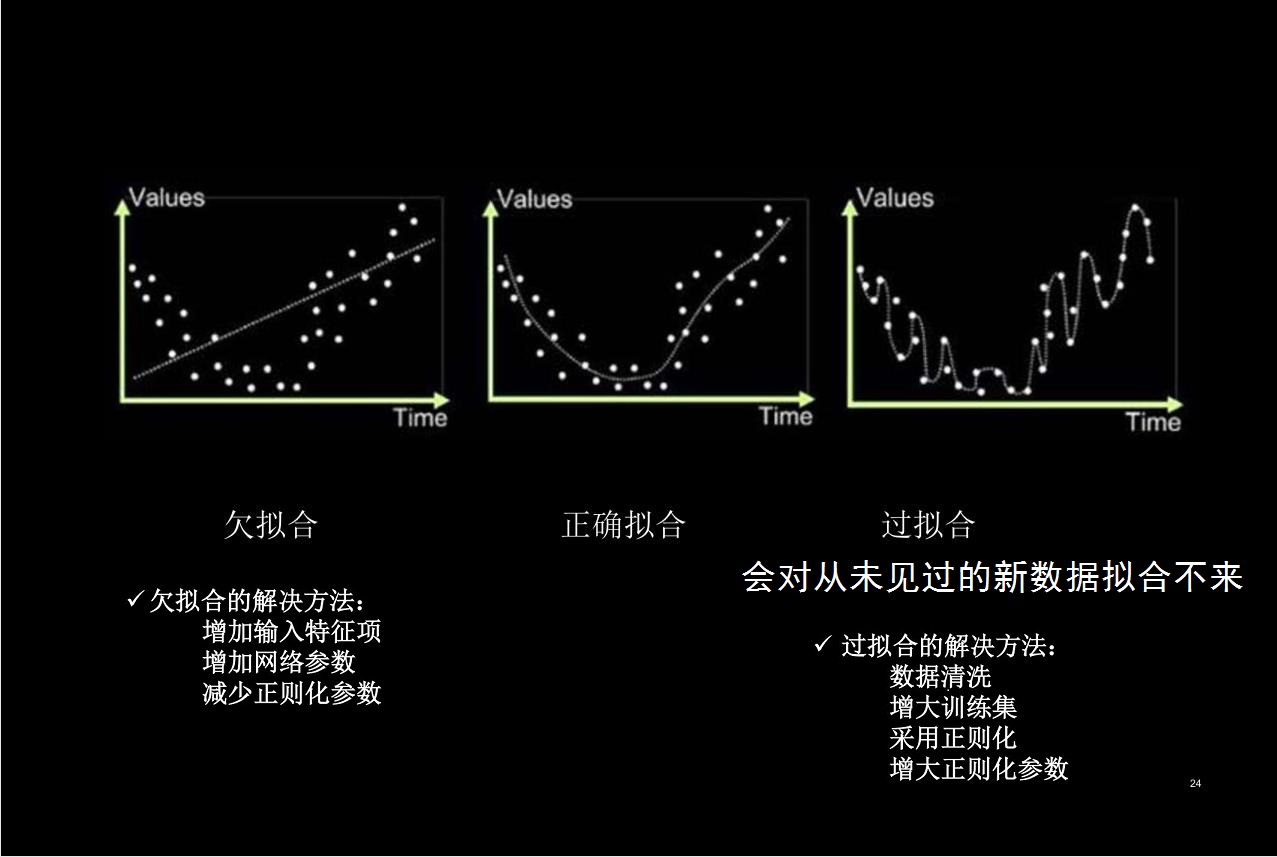

# 正则化缓解过拟合
+ **定义：正则化 是在损失函数中引入模型复杂度指标，通过给W加权重，弱化了数据的噪声（一般不正则化B）**

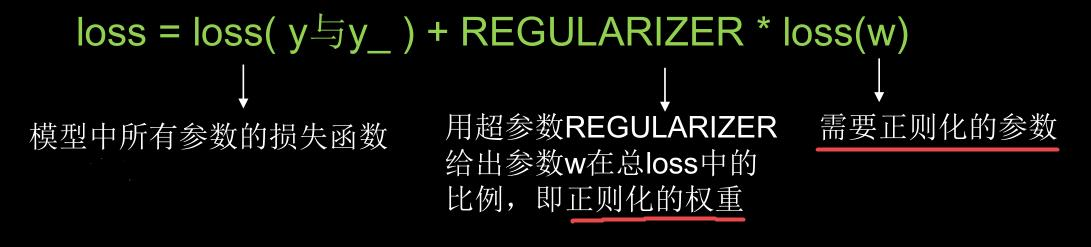
### 一、L1正则化：tf.nn.l1_loss()
$$\mbox{L1正则化：}loss_{L1}(w)=\sum_i|w_i|$$
L1 正则化大概率会使很多参数变为零，因此该方法可通过稀疏参数，减少参数的数量，降低复杂度。
### 二、L2正则化：tf.nn.l2_loss()
$$\mbox{L2正则化：}loss_{L1}(w)=\sum_i|w_i^2|$$
L2 正则化 会使参数很接近零但不为零，因此该方法可通过减小参的数值来降低复杂度。

In [11]:
# -----------------------1. 读入数据和标签 生成x_train y_train-------------------------
df = pd.read_csv('第二讲-L2正则化所用数据.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df[['y_c']])

x_train = np.vstack(x_data).reshape(-1,2) # 纵向拼接，再reshape成两列
y_train = np.vstack(y_data).reshape(-1,1) # 纵向拼接，再reshape成一列

Y_c = [['red' if y else 'blue'] for y in y_train] # 生成颜色集

# --------------2. 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错------------
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# ------------------3. 生成相应的数据集，使输入特征和标签值一一对应--------------------
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# ------------------4. 生成神经网络的参数---------------------------------------------
# 输入层为2个神经元，隐藏层为N个神经元，输出层为1个神经元

n = 11 # 隐藏层神经元个数

w1 = tf.Variable(tf.random.normal([2, n]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[n]))

w2 = tf.Variable(tf.random.normal([n, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

epoches = 800
r = 0.01
# ------------------5. 训练参数w1 w2 b1 b2---------------------------------------------
for epoch in range(epoches):
    for step,(x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            h1 = tf.matmul(x_train, w1) + b1
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2
            # ---不加正则化---
            loss = tf.reduce_mean(tf.square(y - y_train))
            # ======================== 加正则化============================
            loss_regularization = []
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss += 0.03 * loss_regularization #REGULARIZER（正则化权重） = 0.03
            # =========================正则化==============================
            
        grads = tape.gradient(loss, [w1, w2, b1, b2])
        w1.assign_sub(r*grads[0])
        w2.assign_sub(r*grads[1])
        b1.assign_sub(r*grads[2])
        b2.assign_sub(r*grads[3])
    if epoch % 20 == 0:
        print('当前第{}步\n当前误差loss的值为{}\n---------------'.format(epoch, loss))


当前第0步
当前误差loss的值为0.8437967896461487
---------------
当前第20步
当前误差loss的值为0.3182251453399658
---------------
当前第40步
当前误差loss的值为0.26692327857017517
---------------
当前第60步
当前误差loss的值为0.23165461421012878
---------------
当前第80步
当前误差loss的值为0.2074265331029892
---------------
当前第100步
当前误差loss的值为0.188304141163826
---------------
当前第120步
当前误差loss的值为0.1722986102104187
---------------
当前第140步
当前误差loss的值为0.1585254669189453
---------------
当前第160步
当前误差loss的值为0.14655768871307373
---------------
当前第180步
当前误差loss的值为0.13614138960838318
---------------
当前第200步
当前误差loss的值为0.12713178992271423
---------------
当前第220步
当前误差loss的值为0.11933788657188416
---------------
当前第240步
当前误差loss的值为0.11253366619348526
---------------
当前第260步
当前误差loss的值为0.10666164755821228
---------------
当前第280步
当前误差loss的值为0.10164856165647507
---------------
当前第300步
当前误差loss的值为0.09737734496593475
---------------
当前第320步
当前误差loss的值为0.0937408059835434
---------------
当前第340步
当前误差loss的值为0.09062377363443375
---------------
当前第360步
当前误差loss的值为0.087

原数据最大值、最小值： 4.108692624 -2.659449456
所造网格张量： tf.Tensor(
[[-4.  -4. ]
 [-4.  -3.9]
 [-4.  -3.8]
 ...
 [ 3.9  3.7]
 [ 3.9  3.8]
 [ 3.9  3.9]], shape=(6400, 2), dtype=float32)
predict的形状，xx的形状： (6400, 1, 1) (80, 80)
predict的形状，xx的形状： (80, 80) (80, 80)


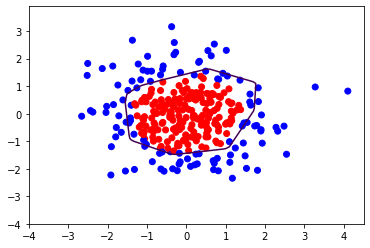

'经过正则化之后的0.5概率等高线更加的平滑'

In [12]:
# ---------------------------------6. 跑预测------------------------------------------
print('原数据最大值、最小值：', x_data.max(), x_data.min())
xx, yy = np.mgrid[-4:4:0.1, -4:4:0.1] # 生成
xx_line = xx.ravel() # 分别拉直
yy_line = yy.ravel()
grid = np.c_[xx_line, yy_line] # 合并
grid = tf.cast(grid, dtype=tf.float32) # 强转化为张量
print('所造网格张量：', grid)

predict = []
for test in grid: # 遍历预测每个网格点
    h1 = tf.matmul([test], w1) + b1 # 这里的test要【中括号】
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2 # 这里的y 就是我们想要的预测结果
    predict.append(y)
# ---------------------------------7. 画图------------------------------------------
x = x_data[ : , 0]
y = x_data[ : , 1]

predict = np.array(predict)
print('predict的形状，xx的形状：', predict.shape, xx.shape)
predict = np.array(predict).reshape(xx.shape)
print('predict的形状，xx的形状：', predict.shape, xx.shape)

#squeeze去掉纬度是1的纬度,相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
plt.scatter(x, y, color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, predict, levels=[.5]) # 等高线图
plt.show()
'''经过正则化之后的0.5概率等高线更加的平滑'''

# 参数优化器
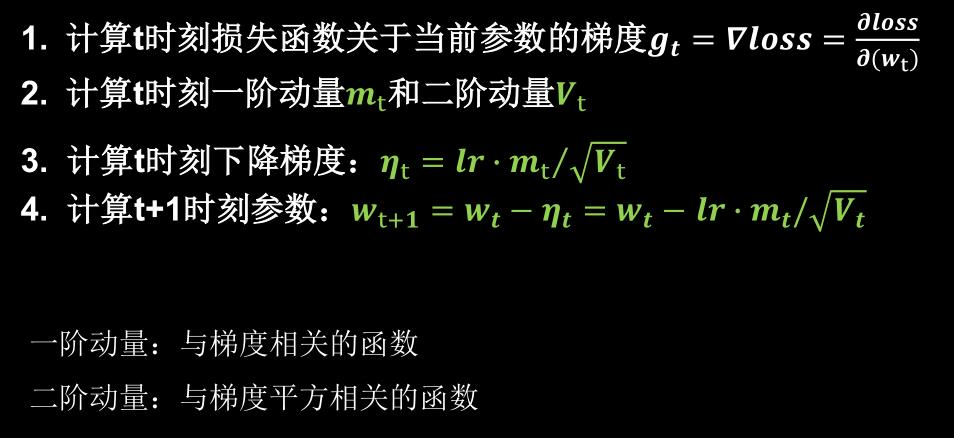

### 1.SGD优化器，最常用的梯度下降法。
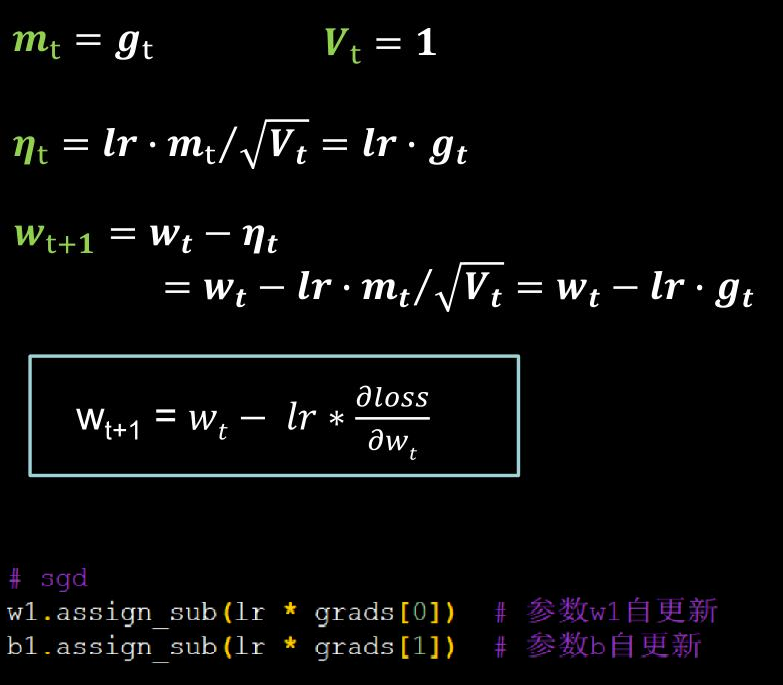

### 2.SGDM，在SGD 基础上增加一阶动量。
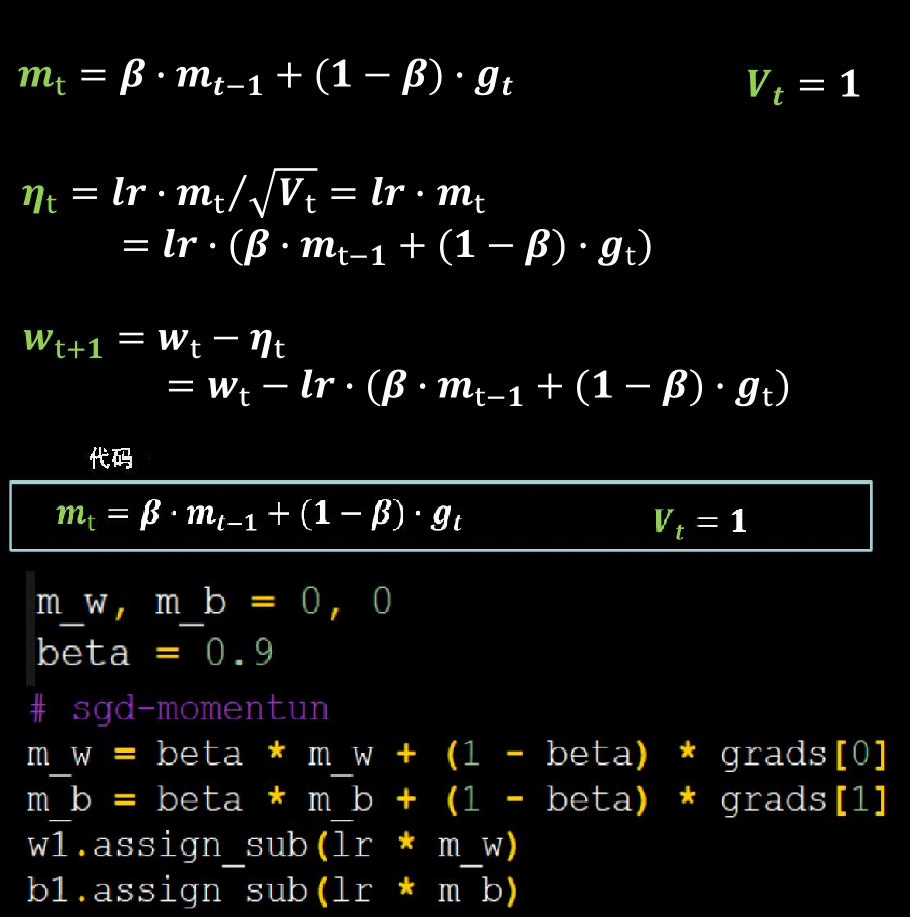

### 3.Adagrad，在SGD 基础上增加二阶动量。
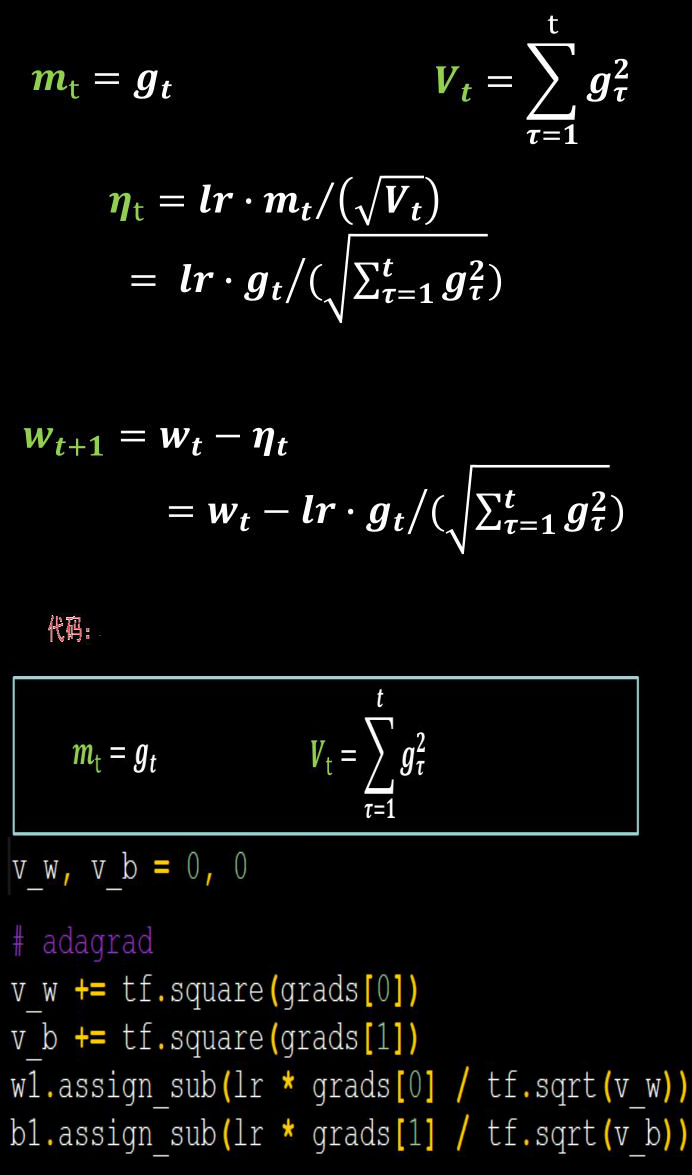

### 4.RMSProp，在SGD 基础上增加二阶动量。
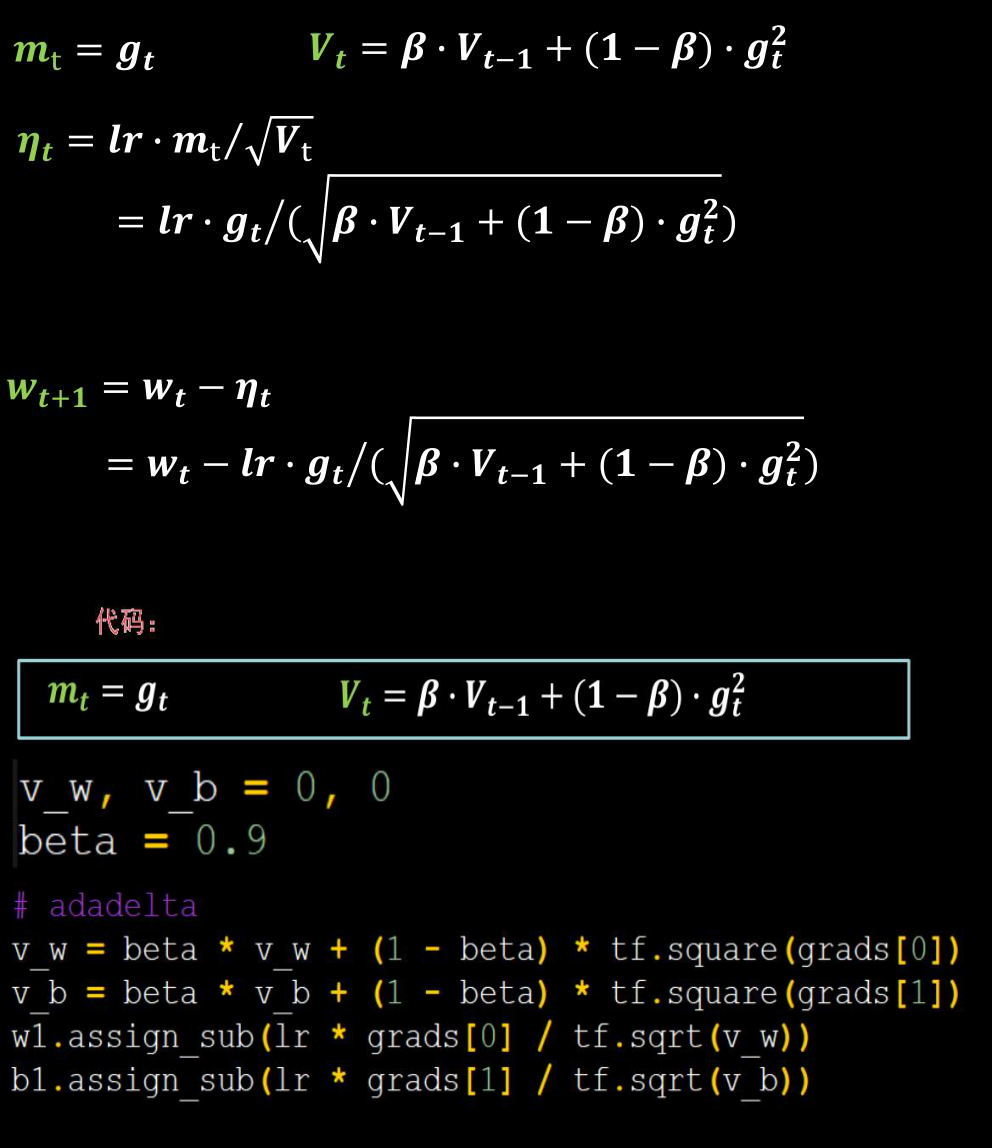

### 5.Adam， 同时结合SGDM的一阶动量和RMSProp的二阶动量。
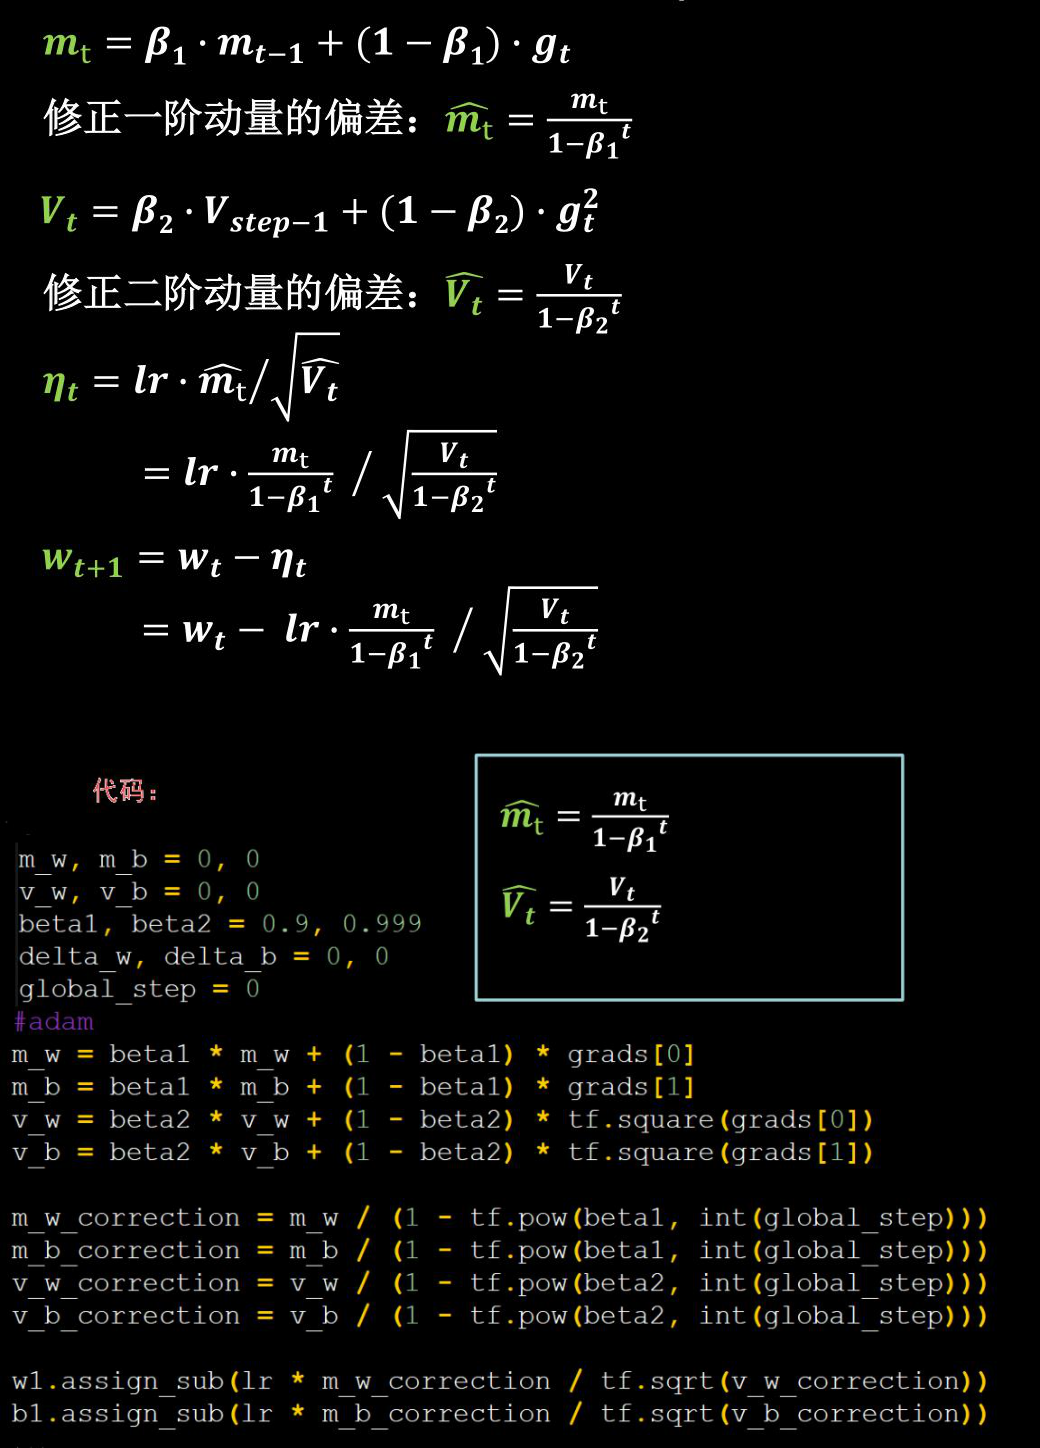

目前步数：第0大步。
本步的均方误差：0.2579703852534294
本大步预测正确率为：0.5333333333333333
目前步数：第1大步。
本步的均方误差：0.18839824944734573
本大步预测正确率为：0.5333333333333333
目前步数：第2大步。
本步的均方误差：0.17316779494285583
本大步预测正确率为：0.5333333333333333
目前步数：第3大步。
本步的均方误差：0.16497275978326797
本大步预测正确率为：0.5333333333333333
目前步数：第4大步。
本步的均方误差：0.15956802107393742
本大步预测正确率为：0.5333333333333333
目前步数：第5大步。
本步的均方误差：0.1582875568419695
本大步预测正确率为：0.5333333333333333
目前步数：第6大步。
本步的均方误差：0.15417397394776344
本大步预测正确率为：0.5333333333333333
目前步数：第7大步。
本步的均方误差：0.13819230161607265
本大步预测正确率为：0.7666666666666667
目前步数：第8大步。
本步的均方误差：0.13383185863494873
本大步预测正确率为：0.5333333333333333
目前步数：第9大步。
本步的均方误差：0.13410237431526184
本大步预测正确率为：0.5333333333333333
目前步数：第10大步。
本步的均方误差：0.11251243390142918
本大步预测正确率为：0.8333333333333334
目前步数：第11大步。
本步的均方误差：0.07304382510483265
本大步预测正确率为：0.5333333333333333
目前步数：第12大步。
本步的均方误差：0.07821979094296694
本大步预测正确率为：1.0
目前步数：第13大步。
本步的均方误差：0.06355977337807417
本大步预测正确率为：0.6333333333333333
目前步数：第14大步。
本步的均方误差：0.06419015768915415
本大步预测正确率为：1.0
目前步数：第1

本大步预测正确率为：1.0
目前步数：第119大步。
本步的均方误差：0.019081767881289124
本大步预测正确率为：1.0
目前步数：第120大步。
本步的均方误差：0.0190349780023098
本大步预测正确率为：1.0
目前步数：第121大步。
本步的均方误差：0.018988879397511482
本大步预测正确率为：1.0
目前步数：第122大步。
本步的均方误差：0.018943403847515583
本大步预测正确率为：1.0
目前步数：第123大步。
本步的均方误差：0.018898578360676765
本大步预测正确率为：1.0
目前步数：第124大步。
本步的均方误差：0.01885436405427754
本大步预测正确率为：1.0
目前步数：第125大步。
本步的均方误差：0.018810763955116272
本大步预测正确率为：1.0
目前步数：第126大步。
本步的均方误差：0.018767760135233402
本大步预测正确率为：1.0
目前步数：第127大步。
本步的均方误差：0.018725308356806636
本大步预测正确率为：1.0
目前步数：第128大步。
本步的均方误差：0.0186834663618356
本大步预测正确率为：1.0
目前步数：第129大步。
本步的均方误差：0.01864213915541768
本大步预测正确率为：1.0
目前步数：第130大步。
本步的均方误差：0.018601359566673636
本大步预测正确率为：1.0
目前步数：第131大步。
本步的均方误差：0.018561138538643718
本大步预测正确率为：1.0
目前步数：第132大步。
本步的均方误差：0.018521386198699474
本大步预测正确率为：1.0
目前步数：第133大步。
本步的均方误差：0.018482189625501633
本大步预测正确率为：1.0
目前步数：第134大步。
本步的均方误差：0.018443464068695903
本大步预测正确率为：1.0
目前步数：第135大步。
本步的均方误差：0.018405228853225708
本大步预测正确率为：1.0
目前步数：第136大步。
本步的均方误差：0.01836747583001852

本大步预测正确率为：1.0
目前步数：第222大步。
本步的均方误差：0.01624100818298757
本大步预测正确率为：1.0
目前步数：第223大步。
本步的均方误差：0.01622462458908558
本大步预测正确率为：1.0
目前步数：第224大步。
本步的均方误差：0.016208393033593893
本大步预测正确率为：1.0
目前步数：第225大步。
本步的均方误差：0.016192267183214426
本大步预测正确率为：1.0
目前步数：第226大步。
本步的均方误差：0.016176270321011543
本大步预测正确率为：1.0
目前步数：第227大步。
本步的均方误差：0.01616039825603366
本大步预测正确率为：1.0
目前步数：第228大步。
本步的均方误差：0.016144636552780867
本大步预测正确率为：1.0
目前步数：第229大步。
本步的均方误差：0.01612900127656758
本大步预测正确率为：1.0
目前步数：第230大步。
本步的均方误差：0.01611348520964384
本大步预测正确率为：1.0
目前步数：第231大步。
本步的均方误差：0.016098083462566137
本大步预测正确率为：1.0
目前步数：第232大步。
本步的均方误差：0.01608279114589095
本大步预测正确率为：1.0
目前步数：第233大步。
本步的均方误差：0.016067612916231155
本大步预测正确率为：1.0
目前步数：第234大步。
本步的均方误差：0.016052564373239875
本大步预测正确率为：1.0
目前步数：第235大步。
本步的均方误差：0.01603760663419962
本大步预测正确率为：1.0
目前步数：第236大步。
本步的均方误差：0.016022763215005398
本大步预测正确率为：1.0
目前步数：第237大步。
本步的均方误差：0.01600802573375404
本大步预测正确率为：1.0
目前步数：第238大步。
本步的均方误差：0.01599340303801
本大步预测正确率为：1.0
目前步数：第239大步。
本步的均方误差：0.015978877898305655
本大步预

本大步预测正确率为：1.0
目前步数：第325大步。
本步的均方误差：0.015032129012979567
本大步预测正确率为：1.0
目前步数：第326大步。
本步的均方误差：0.01502380077727139
本大步预测正确率为：1.0
目前步数：第327大步。
本步的均方误差：0.015015512122772634
本大步预测正确率为：1.0
目前步数：第328大步。
本步的均方误差：0.015007252688519657
本大步预测正确率为：1.0
目前步数：第329大步。
本步的均方误差：0.014999060309492052
本大步预测正确率为：1.0
目前步数：第330大步。
本步的均方误差：0.014990916242823005
本大步预测正确率为：1.0
目前步数：第331大步。
本步的均方误差：0.01498279778752476
本大步预测正确率为：1.0
目前步数：第332大步。
本步的均方误差：0.014974737772718072
本大步预测正确率为：1.0
目前步数：第333大步。
本步的均方误差：0.014966724789701402
本大步预测正确率为：1.0
目前步数：第334大步。
本步的均方误差：0.014958744985051453
本大步预测正确率为：1.0
目前步数：第335大步。
本步的均方误差：0.014950814540497959
本大步预测正确率为：1.0
目前步数：第336大步。
本步的均方误差：0.014942925190553069
本大步预测正确率为：1.0
目前步数：第337大步。
本步的均方误差：0.014935093349777162
本大步预测正确率为：1.0
目前步数：第338大步。
本步的均方误差：0.014927275711670518
本大步预测正确率为：1.0
目前步数：第339大步。
本步的均方误差：0.01491952093783766
本大步预测正确率为：1.0
目前步数：第340大步。
本步的均方误差：0.014911814243532717
本大步预测正确率为：1.0
目前步数：第341大步。
本步的均方误差：0.014904131181538105
本大步预测正确率为：1.0
目前步数：第342大步。
本步的均方误差：0.01489649317227

本大步预测正确率为：1.0
目前步数：第428大步。
本步的均方误差：0.014365874114446342
本大步预测正确率为：1.0
目前步数：第429大步。
本步的均方误差：0.014360883855260909
本大步预测正确率为：1.0
目前步数：第430大步。
本步的均方误差：0.014355917111970484
本大步预测正确率为：1.0
目前步数：第431大步。
本步的均方误差：0.014350991579703987
本大步预测正确率为：1.0
目前步数：第432大步。
本步的均方误差：0.014346071402542293
本大步预测正确率为：1.0
目前步数：第433大步。
本步的均方误差：0.014341161819174886
本大步预测正确率为：1.0
目前步数：第434大步。
本步的均方误差：0.014336298336274922
本大步预测正确率为：1.0
目前步数：第435大步。
本步的均方误差：0.014331445330753922
本大步预测正确率为：1.0
目前步数：第436大步。
本步的均方误差：0.014326609438285232
本大步预测正确率为：1.0
目前步数：第437大步。
本步的均方误差：0.01432180346455425
本大步预测正确率为：1.0
目前步数：第438大步。
本步的均方误差：0.01431701856199652
本大步预测正确率为：1.0
目前步数：第439大步。
本步的均方误差：0.014312253100797534
本大步预测正确率为：1.0
目前步数：第440大步。
本步的均方误差：0.01430749602150172
本大步预测正确率为：1.0
目前步数：第441大步。
本步的均方误差：0.014302767114713788
本大步预测正确率为：1.0
目前步数：第442大步。
本步的均方误差：0.014298079069703817
本大步预测正确率为：1.0
目前步数：第443大步。
本步的均方误差：0.014293384156189859
本大步预测正确率为：1.0
目前步数：第444大步。
本步的均方误差：0.014288706821389496
本大步预测正确率为：1.0
目前步数：第445大步。
本步的均方误差：0.01428407360799

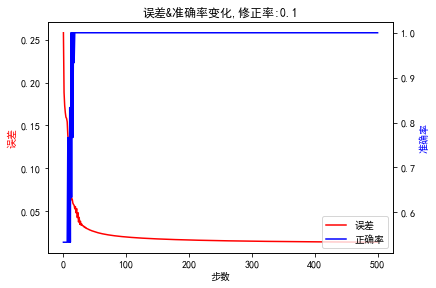

In [14]:
# 鸢尾花练习 加上五种参数优化器
from sklearn.datasets import load_iris
import time  # ----------------------------------------------时间模块
# ------------------------------------数据准备-------------------------------------
x_data = load_iris().data
y_data = load_iris().target
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test  = x_data[-30:]
y_test  = y_data[-30:]
x_train = tf.cast(x_train, tf.float32)
x_test  = tf.cast(x_test, tf.float32)
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
# ------------------------------------参数准备-------------------------------------
r = 0.1
loss4 = 0
epochs = 500
loss_list = []
acc_list = []
w = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1))
b = tf.Variable(tf.random.truncated_normal([3], stddev=0.1))

#--SGDM--超参--SGDM--超参--SGDM--超参--SGDM--超参--SGDM--超参--SGDM--超参--SGDM-
m_w, m_b = 0, 0
beta = 0.9
#--SGDM--超参--SGDM--超参--SGDM--超参--SGDM--超参--SGDM--超参--SGDM--超参--SGDM-

#--Adaread--超参--Adaread--超参--Adaread--超参--超参--Adaread--超参--Adaread-
v_w, v_b = 0, 0
#--Adaread--超参--Adaread--超参--Adaread--超参--超参--Adaread--超参--Adaread-

#--RMSProp--超参--RMSProp--超参--RMSProp--超参--RMSProp--超参--RMSProp--超参-
v_w1, v_b1 = 0, 0
beta1 = 0.9
#--RMSProp--超参--RMSProp--超参--RMSProp--超参--RMSProp--超参--RMSProp--超参-

#--Adam--超参--Adam--超参--Adam--超参--Adam--超参--Adam--超参--Adam--超参--Adam-
m_w2, m_b2 = 0, 0
v_w2, v_b2 = 0, 0
beta01, beta02 = 0.9, 0.999
delta_w, delta_b = 0, 0
global_step = 0
#--Adam--超参--Adam--超参--Adam--超参--Adam--超参--Adam--超参--Adam--超参--Adam-

# ------------------------------------训练部分-------------------------------------
now_time = time.time() # ----------------------------------------------时间模块
for epoch in range(epochs):
    for step, (x_train, y_train) in enumerate(train_db):
        #--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--
        global_step += 1
        #--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--
        with tf.GradientTape() as tape:
            y1 = tf.matmul(x_train, w) + b
            y1 = tf.nn.softmax(y1)
            y2 = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y1 - y2))
            loss4 = loss4 + loss.numpy()
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
        #--SGD--优化器--SGD--优化器--SGD--优化器--SGD--优化器--SGD--优化器--SGD--
        # w.assign_sub(r * dloss_dw)
        # b.assign_sub(r * dloss_db)
        #--SGD--优化器--SGD--优化器--SGD--优化器--SGD--优化器--SGD--优化器--SGD--    
        
        #--SGDM--优化器--SGDM--优化器--SGDM--优化器--SGDM--优化器--SGDM--优化器--
        # m_w = beta * m_w + (1 - beta) * dloss_dw
        # m_b = beta * m_b + (1 - beta) * dloss_db
        # w.assign_sub(r * m_w)
        # b.assign_sub(r * m_b)
        #--SGDM--优化器--SGDM--优化器--SGDM--优化器--SGDM--优化器--SGDM--优化器--
        
        #--Adaread--优化器--Adaread--优化器--Adaread--优化器--Adaread--优化器-
        # v_w += tf.square(dloss_dw)
        # v_b += tf.square(dloss_db)
        # w.assign_sub(r * dloss_dw / tf.sqrt(v_w))
        # b.assign_sub(r * dloss_db / tf.sqrt(v_b))
        #--Adaread--优化器--Adaread--优化器--Adaread--优化器--Adaread--优化器-
        
        #--RMSProp--优化器--RMSProp--优化器--RMSProp--优化器--RMSProp--优化器-
        # v_w1 = beta1 * v_w1 + (1 - beta1) * tf.square(dloss_dw)
        # v_b1 = beta1 * v_b1 + (1 - beta1) * tf.square(dloss_db)
        # w.assign_sub(r * dloss_dw / tf.sqrt(v_w1))
        # b.assign_sub(r * dloss_db / tf.sqrt(v_b1))
        #--RMSProp--优化器--RMSProp--优化器--RMSProp--优化器--RMSProp--优化器-
        
        #--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--
        m_w2 = beta01 * m_w2 + (1 - beta01) * dloss_dw
        m_b2 = beta01 * m_b2 + (1 - beta01) * dloss_db
        v_w2 = beta02 * v_w2 + (1 - beta02) * tf.square(dloss_dw)
        v_b2 = beta02 * v_b2 + (1 - beta02) * tf.square(dloss_db)

        m_w2_correction = m_w2 / (1 - tf.pow(beta01, int(global_step)))
        m_b2_correction = m_b2 / (1 - tf.pow(beta01, int(global_step)))
        v_w2_correction = v_w2 / (1 - tf.pow(beta02, int(global_step)))
        v_b2_correction = v_b2 / (1 - tf.pow(beta02, int(global_step)))

        w.assign_sub(r * m_w2_correction / tf.sqrt(v_w2_correction))
        b.assign_sub(r * m_b2_correction / tf.sqrt(v_b2_correction))
        #--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--Adam--优化器--
        
    print('目前步数：第{}大步。\n本步的均方误差：{}'.format(epoch, loss4/4))
    loss_list.append(loss4/4)
    loss4 = 0

    # ------------------------------------测试部分-------------------------------------
    total_right = 0
    total_number = 0
    for x_test, y_test in test_db:
        y1 = tf.matmul(x_test, w) + b
        y1 = tf.nn.softmax(y1)
        y1_max = tf.argmax(y1, axis=1)
        y2 = y_test
        y1 = tf.cast(y1_max, dtype=y2.dtype)
        compare_TF = tf.equal(y1, y2)
        compare_int = tf.cast(compare_TF, dtype=tf.int32)
        right_count = int(tf.reduce_sum(compare_int))
        total_right = total_right + right_count
        total_number = total_number + y_test.shape[0]
    acc = total_right / total_number
    print('本大步预测正确率为：{}\n======================='.format(acc))
    acc_list.append(acc)
total_time = time.time() - now_time  # -------------------------------------时间模块
print("total_time", total_time)      # -------------------------------------时间模块
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure('误差&准确率变化曲线')
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = ax1.twinx()
x = np.arange(1, epochs+1)
y1 = loss_list
y2 = acc_list
l1, = ax1.plot(x, y1, 'r', label='loss')
l2, = ax2.plot(x, y2, 'b', label='acc')
ax1.set_xlabel('步数')
ax1.set_ylabel('误差', color='r')
ax2.set_ylabel('准确率', color='b')
plt.legend(handles=[l1, l2, ], labels=['误差', '正确率'], loc='best')
plt.title('误差&准确率变化,修正率:{}'.format(r))
plt.show()